In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geemap

import ee

In [2]:
ee.Initialize()

In [4]:
# import urban-img and terrain data
urban = ee.Image("users/wangjinzhulala/North_China_Plain_Python/classificatioin_temporal_checked/Mosaic_only_forward")
region = ee.FeatureCollection("users/wangjinzhulala/North_China_Plain_Python/Boundary_shp/North_China_Plain_Boundary")

# define the year-range
year = [f'{i}_{i+2}' for i in range(1990,2020,3)]
year_img_val_dict = {yr:i for yr,i in zip(year,range(10,0,-1))}

In [5]:
# read the AUC_FCNN
AUC_FCNN = pd.read_csv('./Result/AUC_FCNN.csv')

# add new columns to the df
AUC_FCNN['year_for_prj'] = 0
AUC_FCNN['suitability_map_max'] = np.nan

In [6]:
# read  AUC of each likelyhood-map using AUC_FCNN

suitability_auc_max = []


for idx,row in AUC_FCNN.iterrows():
    
    # get the date and built-up layer
    t0,t1,t2 = row['t0'],row['t1'],row['t2']

    # put the projection year-range to df
    AUC_FCNN.at[idx,'year_for_prj'] = int(t1[:4]) - int(t0[:4])   
    
    # get the auc of FCNN
    fcnn_auc = row['AUC'] 
    
    # read the AUC of likelyhood-map
    suitability_auc = pd.read_csv(f'./Result/AUC_{t0}_and_{t1}_prj_{t2}.csv')
    suitability_max = suitability_auc.max()['AUC']
    suitability_max_row = suitability_auc[suitability_auc['AUC']==suitability_max]
  
    suitability_auc_max.append({'t0':t0,
                                't1':t1,
                                't2':t2,
                                'DEM':suitability_max_row['DEM'].values[0],
                                'SLOPE':suitability_max_row['SLOPE'].values[0],
                                'Distance':suitability_max_row['Distance'].values[0]})
    
    # put the projection year-range to df
    AUC_FCNN.at[idx,'suitability_map_max'] = suitability_max

In [7]:
pd.DataFrame(suitability_auc_max)

,t0,t1,t2,DEM,SLOPE,Distance
0,1990_1992,1993_1995,1996_1998,3,0,96
1,1990_1992,1996_1998,2002_2004,0,1,97
2,1990_1992,1999_2001,2008_2010,2,4,92
3,1990_1992,2002_2004,2014_2016,1,0,97
4,1993_1995,1996_1998,1999_2001,0,1,97
5,1993_1995,1999_2001,2005_2007,4,4,91
6,1993_1995,2002_2004,2011_2013,2,7,90
7,1993_1995,2005_2007,2017_2019,3,3,92
8,1996_1998,1999_2001,2002_2004,15,4,79
9,1996_1998,2002_2004,2008_2010,5,2,91


In [8]:
AUC_FCNN

,t0,t1,t2,AUC,fpr,tpr,thresholds,year_for_prj,suitability_map_max
0,1990_1992,1993_1995,1996_1998,0.927851,[0.00000000e+00 0.00000000e+00 1.41522785e-04 ...,[0. 0.00540541 0.00540541 ... 1. ...,[1.4175e+00 4.1750e-01 4.0890e-01 ... 1.0000e-...,3,0.913590
1,1990_1992,1996_1998,2002_2004,0.893843,[0.00000000e+00 3.58281681e-05 1.79140841e-04 ...,[0. 0. 0. ... 1. 1. 1.],[1.4874e+00 4.8740e-01 4.7990e-01 ... 1.3000e-...,6,0.890220
2,1990_1992,1999_2001,2008_2010,0.843127,[0.00000000e+00 3.66354045e-05 3.66354045e-05 ...,[0. 0. 0.00123457 ... 1. ...,[1.6652e+00 6.6520e-01 5.9250e-01 ... 4.0000e-...,9,0.834602
3,1990_1992,2002_2004,2014_2016,0.849582,[0.00000000e+00 3.77244605e-05 3.77244605e-05 ...,[0.00000000e+00 0.00000000e+00 7.12758375e-04 ...,[1.6313e+00 6.3130e-01 6.2230e-01 ... 2.0000e-...,12,0.823093
4,1993_1995,1996_1998,1999_2001,0.923546,[0.00000000e+00 3.55795915e-05 2.84636732e-04 ...,[0. 0. 0. ... 1. 1. 1.],[1.3248e+00 3.2480e-01 2.7350e-01 ... 1.5000e-...,3,0.923442
5,1993_1995,1999_2001,2005_2007,0.885085,[0.00000000e+00 3.61846866e-05 1.08554060e-04 ...,[0. 0. 0. ... 1. 1. 1.],[1.4233e+00 4.2330e-01 3.8630e-01 ... 3.0000e-...,6,0.866619
6,1993_1995,2002_2004,2011_2013,0.860020,[0.00000000e+00 0.00000000e+00 7.42721331e-05 ...,[0. 0.00101729 0.00101729 ... 1. ...,[1.4335e+00 4.3350e-01 4.2140e-01 ... 3.0000e-...,9,0.841912
7,1993_1995,2005_2007,2017_2019,0.827177,[0.00000000e+00 3.85876905e-05 7.71753811e-05 ...,[0. 0. 0. ... 1. 1. 1.],[1.5857e+00 5.8570e-01 5.6650e-01 ... 3.0000e-...,12,0.803484
8,1996_1998,1999_2001,2002_2004,0.858091,[0.00000000e+00 3.58281681e-05 7.16563362e-05 ...,[0. 0. 0. 0.00512821 0...,[1.1691e+00 1.6910e-01 1.5520e-01 1.5230e-01 1...,3,0.869367
9,1996_1998,2002_2004,2008_2010,0.875384,[0. 0. 0. ... 0.999780...,[0. 0.00162602 0.00325203 ... 1. ...,[1.5685e+00 5.6850e-01 4.2390e-01 ... 4.0000e-...,6,0.867914


Text(0, 0.5, 'AUC')

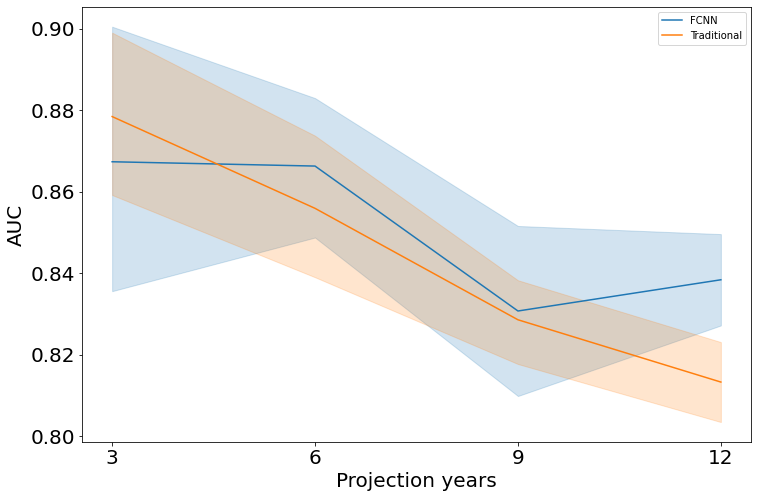

In [9]:
plt.figure(figsize=(12,8))
sns.lineplot(data=AUC_FCNN,x='year_for_prj',y='AUC',label = 'FCNN')
sns.lineplot(data=AUC_FCNN,x='year_for_prj',y='suitability_map_max',label = 'Traditional')
plt.xticks(range(3,13,3),size=20)
plt.yticks(size=20)
plt.xlabel('Projection years',size=20)
plt.ylabel('AUC',size=20)

Text(0, 0.5, 'AUC')

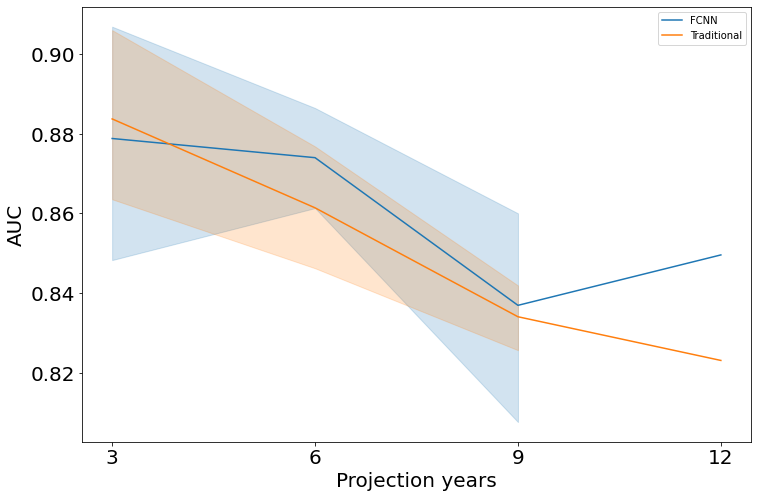

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(data=AUC_FCNN[AUC_FCNN['t2']!='2017_2019'],x='year_for_prj',y='AUC',label = 'FCNN')
sns.lineplot(data=AUC_FCNN[AUC_FCNN['t2']!='2017_2019'],x='year_for_prj',y='suitability_map_max',label = 'Traditional')
plt.xticks(range(3,13,3),size=20)
plt.yticks(size=20)
plt.xlabel('Projection years',size=20)
plt.ylabel('AUC',size=20)